In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
import shutil
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain

In [5]:
file = os.path.join(root_directory,
                    '2019_nov_meanbrain',
                    'template alignment',
                    'meanbrain_n4.nii')

meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing

meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))

plt.imshow(meanbrain.numpy()[:,:,150])


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 605.53 ms


# Load Template

In [7]:
file = os.path.join(root_directory,
                    '2019_nov_meanbrain',
                    'template alignment',
                    'template_n4.nii')

template = bbb.load_numpy_brain(file)

# Set resolution
template = ants.from_numpy(template)
ants.set_spacing(template, (0.622, 0.622, 0.622))

plt.imshow(template.numpy()[:,:,150])


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 499.02 ms


# Load ROIs


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 787.41 ms


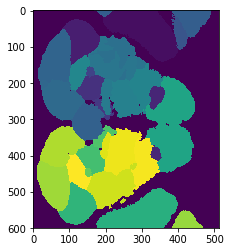

In [17]:
file = 'JFRCtempate2010.mask130819_Original.nii'
roi_file = template_file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190224_anatomy_central',
                                        'meanbrain1',
                                         file)
roi = bbb.load_numpy_brain(template_file)

# Flip Z-axis
roi = roi[:,:,::-1]

# Cut off optic lobes
roi = roi[200:800,:,:]

plt.imshow(roi[:,:,80])

roi = ants.from_numpy(roi)
ants.set_spacing(roi, (0.622, 0.622, 0.622))

# Load Anatomies

In [29]:
flies = ['fly_1',
         'fly_3',
         'fly_5',
         'fly_7',
         'fly_19',
         'fly_21',
         'fly_48',
         'fly_51',
         'fly_54',
         'fly_68']

anatomy = {}

for fly in flies:
    anat_folder = os.path.join(root_directory, fly, 'anat_0')
    try:
        anatomy[fly] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy_channel_1.nii'))
        print('Loaded {}'.format(fly))
    except:
        print('failed to load anatomy_channel_1.nii: {}'.format(fly))
        try:
            anatomy[fly] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy.nii'))
        except:
            print('failed to load anatomy.nii: {}'.format(fly))


~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_1

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 766.19 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_3

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 688.13 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_5

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 608.84 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_7

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 533.45 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_19

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 578.80 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_21

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 601.67 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 482.12 ms
Loaded fly_48

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 528.76 ms
Loaded fly_51

~~ load_numpy_brain ~~
lo

In [30]:
to_rotate = ['fly_1', 'fly_7']
for k in to_rotate:
    anatomy[k] = np.swapaxes(anatomy[k],0,1)

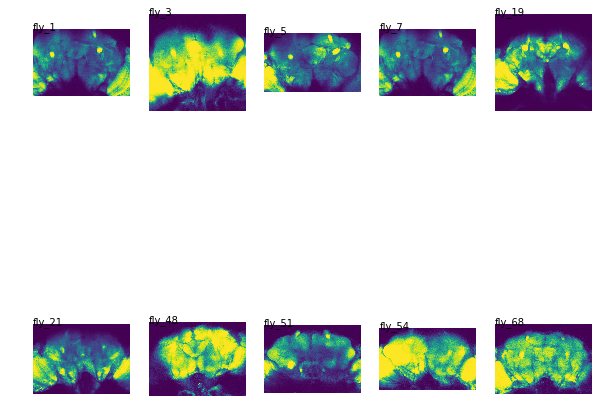

In [31]:
plt.figure(figsize=(10,10))
for i,k in enumerate(anatomy):
    plt.subplot(2,5,i+1)
    plt.imshow(anatomy[k][:,:,100].T)
    plt.axis('off')
    plt.text(0,0,k)

In [32]:
anatomy_ants = {}
for anat in anatomy:
    anatomy_xml = os.path.join(root_directory, anat, 'anat_0', 'anatomy.xml')
    anatomy_ants[anat] = ants.from_numpy(anatomy[anat])
    anatomy_ants[anat].set_spacing(bbb.get_resolution(anatomy_xml))
    print('DONE: {}'.format(anat))

DONE: fly_1
DONE: fly_3
DONE: fly_5
DONE: fly_7
DONE: fly_19
DONE: fly_21
DONE: fly_48
DONE: fly_51
DONE: fly_54
DONE: fly_68


# Align template_n4 to meanbrain_n4

In [12]:
master = meanbrain
slave = template

print('Started...')
t0 = time.time()
template2mean = ants.registration(master,
                                  slave,
                                  type_of_transform='SyN')
print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Started...
COMPLETE. Duration: 335 sec


### Save parameters

In [13]:
save_folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms'
if not os.path.exists(save_folder):
    os.mkdir(save_folder)

In [16]:
for transform in template2mean['fwdtransforms']:
    transform_file = os.path.split(transform)[-1]
    save_file = os.path.join(save_folder, transform_file)
    print('Copying from {} to {}'.format(transform, save_file))
    shutil.copy(transform, save_file)

save_file: /oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms/tmpx_s4tlu81Warp.nii.gz
Copying from /tmp/tmpx_s4tlu81Warp.nii.gz to /oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms/tmpx_s4tlu81Warp.nii.gz
save_file: /oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms/tmpx_s4tlu80GenericAffine.mat
Copying from /tmp/tmpx_s4tlu80GenericAffine.mat to /oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms/tmpx_s4tlu80GenericAffine.mat


In [34]:
template2mean

{'fwdtransforms': ['/tmp/tmpx_s4tlu81Warp.nii.gz',
  '/tmp/tmpx_s4tlu80GenericAffine.mat'],
 'invtransforms': ['/tmp/tmpx_s4tlu80GenericAffine.mat',
  '/tmp/tmpx_s4tlu81InverseWarp.nii.gz'],
 'warpedfixout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (600, 512, 218)
 	 Spacing    : (0.622, 0.622, 0.622)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 'warpedmovout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (512, 368, 251)
 	 Spacing    : (0.768, 0.768, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]}

# Warp ROIs from template2mean, then from mean2anat

### First, roi2mean

In [19]:
transforms = ['/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms/tmpx_s4tlu81Warp.nii.gz',
              '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/template2mean_transforms/tmpx_s4tlu80GenericAffine.mat']

In [20]:
roi2mean = ants.apply_transforms(fixed = meanbrain,
                                 moving = roi,
                                 transformlist = transforms,
                                 interpolator='genericLabel')

In [48]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/roi2mean_5.nii'
bbb.save_brain(save_file, roi2mean.numpy())


~~ save_brain ~~
Current memory usage: 9.25GB
save_brain done. Duration: 642.89 ms


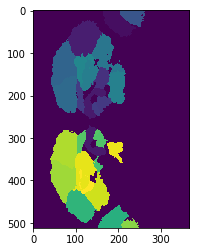

In [28]:
plt.imshow(roi2mean.numpy()[:,:,80])

### Next, roi2mean 2 anat

In [40]:
transform_folder = os.path.join(root_directory, 'fly_1', 'anat_0', 'warps_20191105', 'inverse')

In [41]:
transforms = [os.path.join(transform_folder, 'tmp33kitrag0GenericAffine.mat'),
              os.path.join(transform_folder, 'tmp33kitrag1InverseWarp.nii.gz')]

In [42]:
roi2anat = ants.apply_transforms(fixed = anatomy_ants['fly_1'],
                                 moving = roi2mean,
                                 transformlist = transforms,
                                 interpolator='genericLabel')

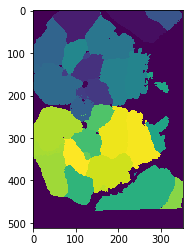

In [43]:
plt.imshow(roi2anat.numpy()[:,:,80])

In [46]:
save_file = os.path.join(root_directory, 'fly_1', 'anat_0', 'warps_20191105', 'roi2anat.nii')
bbb.save_brain(save_file, roi2anat.numpy())


~~ save_brain ~~
Current memory usage: 9.25GB
save_brain done. Duration: 680.07 ms


In [45]:
bbb.save_brain?

In [47]:
save_file = os.path.join(root_directory, 'fly_1', 'anat_0', 'anat_flip_nov5.nii')
bbb.save_brain(save_file, anatomy_ants['fly_1'].numpy())


~~ save_brain ~~
Current memory usage: 9.25GB
save_brain done. Duration: 659.85 ms
